# **Some Common type of Outlier Algorithms:**


# 1.   Angle-Based Outlier Detection (ABOD):

It considers the relationship between each point and its neighbor(s). It does not consider the relationships among these neighbors. The variance of its weighted cosine scores to all neighbors could be viewed as the outlying score
ABOD performs well on multi-dimensional data
PyOD provides two different versions of ABOD:

1.Fast ABOD: Uses k-nearest neighbors to approximate

2.Original ABOD: Considers all training points with high-time complexity

# 2.   k-Nearest Neighbors Detector:

For any data point, the distance to its kth nearest neighbor could be viewed as the outlying score
PyOD supports three kNN detectors:

**Largest:** Uses the distance of the kth neighbor as the outlier score

**Mean:** Uses the average of all k neighbors as the outlier score

**Median:** Uses the median of the distance to k neighbors as the outlier score
# 3.   Isolation Forest:
It uses the scikit-learn library internally. In this method, data partitioning is done using a set of trees. Isolation Forest provides an anomaly score looking at how isolated the point is in the structure. The anomaly score is then used to identify outliers from normal observations
Isolation Forest performs well on multi-dimensional data

# 4.   Histogram-based Outlier Detection:
It is an efficient unsupervised method which assumes the feature independence and calculates the outlier score by building histograms
It is much faster than multivariate approaches, but at the cost of less precision

# 5.   Local Correlation Integral (LOCI):

LOCI is very effective for detecting outliers and groups of outliers. It provides a LOCI plot for each point which summarizes a lot of the information about the data in the area around the point, determining clusters, micro-clusters, their diameters, and their inter-cluster distances.

None of the existing outlier-detection methods can match this feature because they output only a single number for each point

# 6.   Feature Bagging:

A feature bagging detector fits a number of base detectors on various sub-samples of the dataset. It uses averaging or other combination methods to improve the prediction accuracy
By default, Local Outlier Factor (LOF) is used as the base estimator. However, any estimator could be used as the base estimator, such as kNN and ABOD
Feature bagging first constructs n sub-samples by randomly selecting a subset of features. This brings out the diversity of base estimators. Finally, the prediction score is generated by averaging or taking the maximum of all base detectors

# 7.   Clustering Based Local Outlier Factor:

It classifies the data into small clusters and large clusters. The anomaly score is then calculated based on the size of the cluster the point belongs to, as well as the distance to the nearest large cluster



In [1]:
!pip install pyod


In [2]:
#IMPORTING THE REQUIRED FUNCTION
from pyod.models.knn import KNN  
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize


In [3]:
# Data Generation:
contamination = 0.1  # percentage of outliers
n_train = 200  # number of training points
n_test = 100  # number of testing points

X_train, y_train, X_test, y_test = generate_data(
    n_train=n_train, n_test=n_test, contamination=contamination)

/usr/local/lib/python3.6/dist-packages/pyod/utils/data.py:189: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.8.0. Please use behaviour="new", which makes the returned datasets in the order of X_train, X_test, y_train, y_test.
  FutureWarning)


In [4]:
# train kNN detector
clf_name = 'KNN'
clf = KNN()
clf.fit(X_train)

KNN(algorithm='auto', contamination=0.1, leaf_size=30, method='largest',
  metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=5, p=2,
  radius=1.0)

In [5]:
# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

In [6]:
y_train_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0])

In [7]:
# get the prediction on the test data
y_test_pred = clf.predict(X_test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(X_test)  # outlier scores


In [8]:
y_test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [9]:
from pyod.utils.data import evaluate_print
# evaluate and print the results
print("\nOn Training Data:")
evaluate_print(clf_name, y_train, y_train_scores)
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)


On Training Data:
KNN ROC:0.9492, precision @ rank n:0.85

On Test Data:
KNN ROC:0.8967, precision @ rank n:0.8


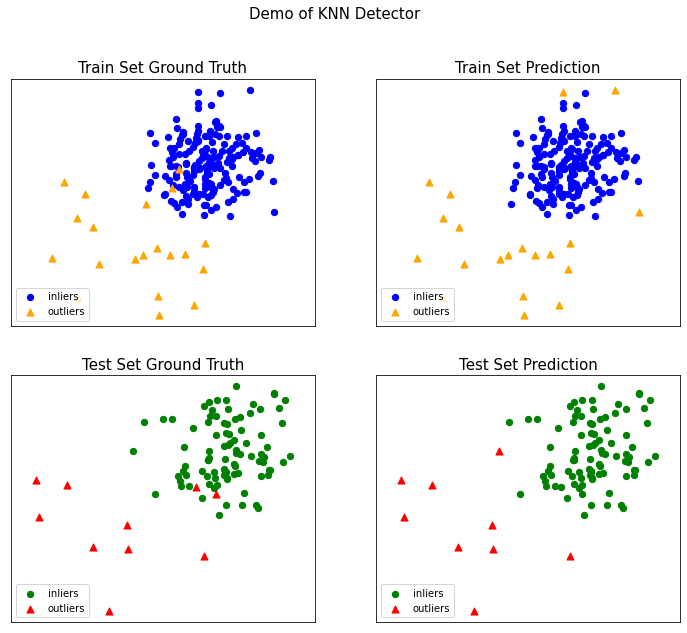

In [10]:
#Visualize the outliers
visualize(clf_name, X_train, y_train, X_test, y_test, y_train_pred,
          y_test_pred, show_figure=True, save_figure=False)